In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt #matlab plots
%matplotlib inline

In [2]:
df= pd.read_csv(r'C:\Users\User\Downloads\part_b.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126 entries, 0 to 125
Data columns (total 27 columns):
Serving Size (g)                        126 non-null int64
Calories                                126 non-null int64
Total Fat (g)                           126 non-null float64
Saturated Fat (g)                       126 non-null float64
Trans Fat (g)                           126 non-null float64
Sodium (mg)                             126 non-null float64
Carbs (g)                               126 non-null float64
Sugars (g)                              126 non-null float64
Protein (g)                             126 non-null float64
Fast Food Restaurant_Burger King        126 non-null int64
Fast Food Restaurant_Carl's Jr.         126 non-null int64
Fast Food Restaurant_Chick-fil-A        126 non-null int64
Fast Food Restaurant_Dairy Queen        126 non-null int64
Fast Food Restaurant_Hardee's           126 non-null int64
Fast Food Restaurant_In-N-Out Burger    126 non-null in

In [4]:
X = df.drop(['Calories'],axis=1, inplace=False)
y = df['Calories']

In [5]:
from sklearn.model_selection import train_test_split

X_train_org, X_test_org, y_train, y_test = train_test_split(X,y,random_state=0)
print('X_train shape is', X_train_org.shape)
print('X_test shape is', X_test_org.shape)
print('y_train shape is', y_train.shape)
print('y_test shape is', y_test.shape)

X_train shape is (94, 26)
X_test shape is (32, 26)
y_train shape is (94,)
y_test shape is (32,)


In [6]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train_org)
X_test = scaler.transform(X_test_org)


In [7]:
from sklearn.decomposition import PCA
pca = PCA(0.95)
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=0.95, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [8]:
pca.transform(X_train)

array([[-3.4580802 ,  1.10305886,  0.72058585, ..., -0.11830649,
        -0.43343033,  0.22481646],
       [ 0.00533446,  0.92992716,  2.29603262, ..., -1.43263512,
        -1.40024568, -1.29060996],
       [ 3.61068839,  2.54764798, -1.72962662, ..., -1.20601579,
         0.95297555, -1.15902194],
       ...,
       [ 1.01805598,  0.83528422,  2.16529644, ...,  0.24968773,
        -0.66457628, -1.61626048],
       [ 5.27694779,  2.73828575, -2.0795303 , ..., -0.88924219,
         1.22996958, -0.36547419],
       [-1.5560421 , -0.95559704, -1.18640403, ..., -0.49042721,
         1.0823489 , -0.26573377]])

In [9]:
pca.n_components_ 

16

In [10]:
X_train = pca.transform(X_train)
X_test = pca.transform(X_test)

In [12]:
X_train.shape

(94, 16)

In [16]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(random_state= 0, max_iter = 1000)
sgd_reg.fit(X_train, y_train)
print(sgd_reg.score(X_train, y_train))
print(sgd_reg.score(X_test, y_test))
print("Test scores: {:.4f}".format(sgd_reg.score(X_test, y_test)))

0.8575537291396838
0.8519865646628162
Test scores: 0.8520


In [15]:
sgd_reg.score(X_test,y_test)

0.8519865646628162

In [56]:
from sklearn.manifold import LocallyLinearEmbedding

lle = LocallyLinearEmbedding(n_components=2,n_neighbors=10)
X_train = lle.fit_transform(X_train)

<IPython.core.display.Javascript object>


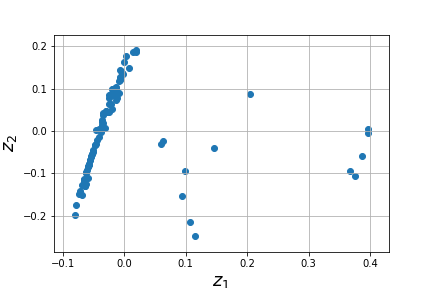

In [62]:
%matplotlib notebook 

plt.scatter(X_train[:,0], X_train[:, 1], cmap=plt.cm.hot)
plt.xlabel("$z_1$", fontsize=18)
plt.ylabel("$z_2$", fontsize=18)

plt.grid(True)